In [36]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skew, boxcox_normmax
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [37]:
#Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
# Reading csv as a dataframe
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [38]:
# First look at its main features (head, shape, info).
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [39]:
customer_df.shape

(9134, 24)

In [40]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [41]:
#Rename the columns so they follow the PE8 (snake case).
# Standardization of header names
def standardization(df):
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ','_')

In [42]:
standardization(customer_df)
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [43]:
# Change effective to date column to datetime format.
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [44]:
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [45]:
# Check NaN values per column.
def nulls_data(df):
    nulls_df = pd.DataFrame(round(df.isna().sum()/len(df)*100,2))
    nulls_df = nulls_df.reset_index()
    nulls_df.columns = ['header_name', '%_null_values'] 
    return nulls_df
nulls_data(customer_df)

,header_name,%_null_values
0,customer,0.0
1,state,0.0
2,customer_lifetime_value,0.0
3,response,0.0
4,coverage,0.0
5,education,0.0
6,effective_to_date,0.0
7,employmentstatus,0.0
8,gender,0.0
9,income,0.0


In [46]:
# Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
num = customer_df.select_dtypes(include = np.number)
cat = customer_df.select_dtypes(include = np.object)
categorical_columns = customer_df.select_dtypes(include=['object']).columns.tolist()
categorical_columns 



['customer',
 'state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [47]:
#Load the continuous and discrete variables into continuous_df and discrete_df variables.
def continuous_discrete(df):
    numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
    continuos = []
    discrete = []
    for col in numerical_columns:
        if df[col].nunique() / len(df[col]) <= 0.05:
            discrete.append(col)
        else:
            continuos.append(col)
    return df[continuos], df[discrete]  
    

In [48]:
continuous_df, discrete_df = continuous_discrete(customer_df)

In [49]:
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [50]:
discrete_df

,effective_to_date,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2011-02-24,69,32,5,0,1
1,2011-01-31,94,13,42,0,8
2,2011-02-19,108,18,38,0,2
3,2011-01-20,106,18,65,0,7
4,2011-02-03,73,12,44,0,1
...,...,...,...,...,...,...
9129,2011-02-10,73,18,89,0,2
9130,2011-02-12,79,14,28,0,1
9131,2011-02-06,85,9,37,3,2
9132,2011-02-03,96,34,3,0,3


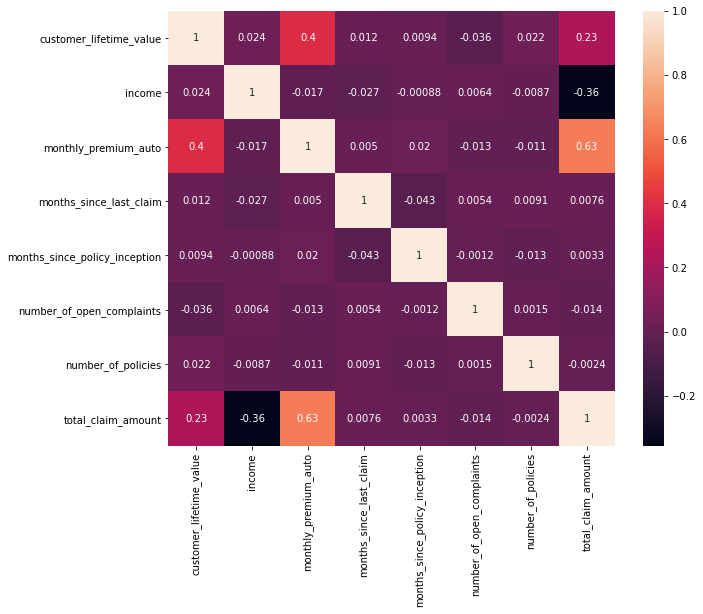

In [51]:
#Plot a correlation matrix, what can you see?
corr_matrix=num.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()
# we can see the correlation between different variables. monthly_premium_auto and total_claim_amount have the highest correlation wuth each other.

In [52]:
#Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
def plot_discrete(df,cols_disc):

     for col in cols_disc:
        print("Frequency analysis of column: ",col)
        my_data = df[col].value_counts().reset_index()
        ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
        plt.figure()
        print()

In [53]:
discrete = discrete_df.copy()
#discrete_df.drop(['effect'])

In [54]:
discrete = discrete.drop(['effective_to_date'],axis=1)

Frequency analysis of column:  monthly_premium_auto

Frequency analysis of column:  months_since_last_claim

Frequency analysis of column:  months_since_policy_inception

Frequency analysis of column:  number_of_open_complaints

Frequency analysis of column:  number_of_policies



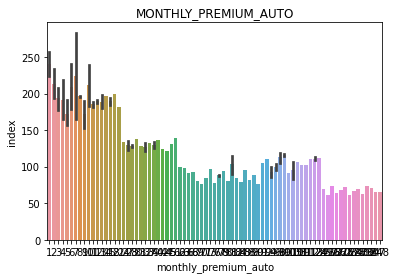

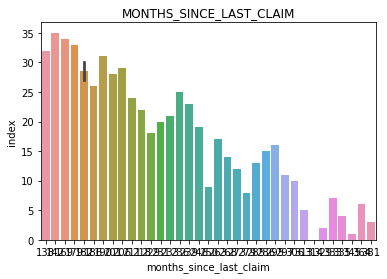

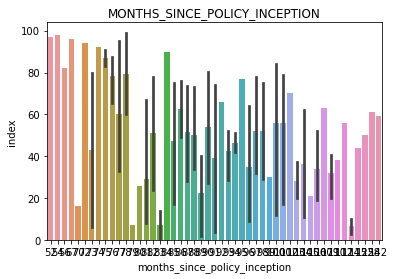

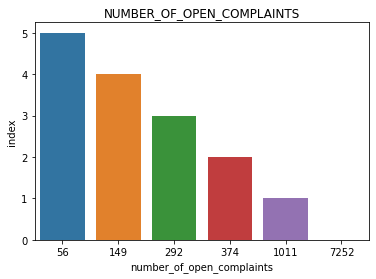

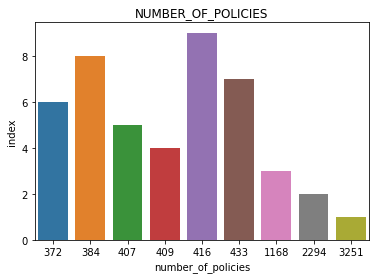

<Figure size 432x288 with 0 Axes>

In [55]:
cols_disc = discrete.columns
plot_discrete(discrete_df,cols_disc)

In [56]:
def plot_continuous(df,cols):
    for col in cols:
        sns.distplot(df[col],bins= 100, 
                       color = 'blue')
        plt.title('Distribution')
        plt.show()

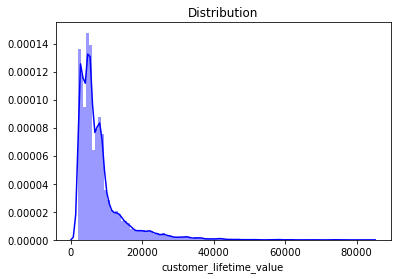

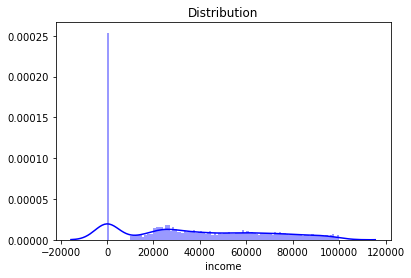

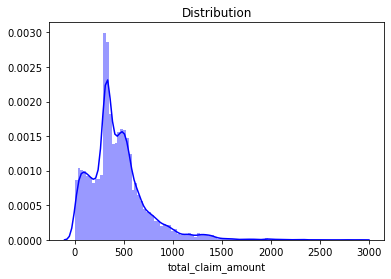

In [57]:
#What can you see in the plots?
 # the plots show that their distributions are not normal and they are skewed
cols_con = continuous_df.columns
plot_continuous(continuous_df,cols_con)

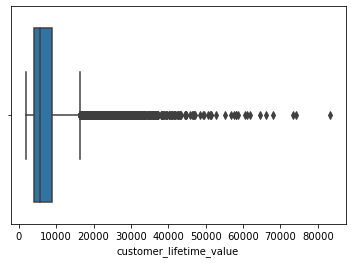

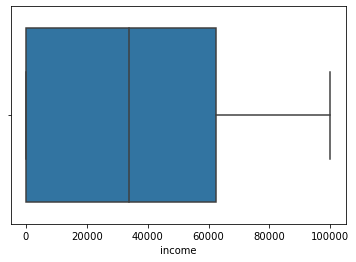

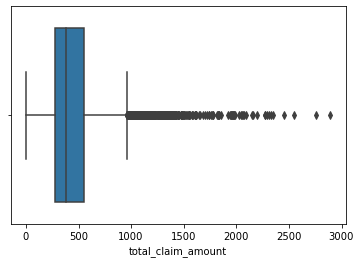

In [58]:
#Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
# checking for outliers
for col in cols_con:
    sns.boxplot(continuous_df[col])
    plt.show()
    
# outliers in columns customer_lifetime_value and total_claim_amount are observable!    

In [59]:
# removing outliers
iqr1=np.percentile(continuous_df['customer_lifetime_value'],75)-np.percentile(continuous_df['customer_lifetime_value'],25)
upper_limit1=np.percentile(continuous_df['customer_lifetime_value'],75) +1.5*iqr1
lower_limit1=np.percentile(continuous_df['customer_lifetime_value'],75) -1.5*iqr1
upper_limit1, lower_limit1

(16414.039911750002, 1510.2941707499995)

In [60]:
customer_df = customer_df[(continuous_df['customer_lifetime_value'] > lower_limit1) & (continuous_df['customer_lifetime_value'] < upper_limit1)]
customer_df = customer_df.reset_index()
customer_df=customer_df.drop(['index'], axis=1)
customer_df['customer_lifetime_value']

0        2763.519279
1        6979.535903
2       12887.431650
3        7645.861827
4        2813.692575
            ...     
8312     4100.398533
8313     3096.511217
8314     8163.890428
8315     7524.442436
8316     2611.836866
Name: customer_lifetime_value, Length: 8317, dtype: float64

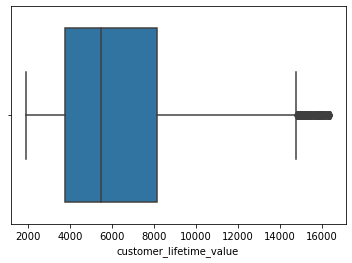

In [61]:
sns.boxplot(customer_df['customer_lifetime_value'])

In [62]:
iqr2=np.percentile(continuous_df['total_claim_amount'],75)-np.percentile(continuous_df['total_claim_amount'],25)
upper_limit2=np.percentile(continuous_df['total_claim_amount'],75) +1.5*iqr1
lower_limit2=np.percentile(continuous_df['total_claim_amount'],75) -1.5*iqr1
upper_limit2, lower_limit2

(7999.3877092500015, -6904.358031750001)

In [63]:
customer_df = customer_df[(continuous_df['total_claim_amount'] > lower_limit2) & (continuous_df['total_claim_amount'] < upper_limit2)]
customer_df = customer_df.reset_index()
customer_df=customer_df.drop(['index'], axis=1)
customer_df['total_claim_amount']

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
8312     541.282007
8313     379.200000
8314     790.784983
8315     691.200000
8316     369.600000
Name: total_claim_amount, Length: 8317, dtype: float64

In [64]:
# Check nan values per column.
# they were checked above!

In [65]:
#Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
# it was done above!

In [66]:
# Plot all the categorical variables with the proper plot. What can you see?
def plot_cat(df,cols):

     for col in cols:
        print("Frequency analysis of column: ",col)
        my_data = df[col].value_counts().reset_index()
        ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
        plt.figure()
        print()

In [69]:
cat2=cat.drop(['customer'],axis=1)

Frequency analysis of column:  state

Frequency analysis of column:  response

Frequency analysis of column:  coverage

Frequency analysis of column:  education

Frequency analysis of column:  employmentstatus

Frequency analysis of column:  gender

Frequency analysis of column:  location_code

Frequency analysis of column:  marital_status

Frequency analysis of column:  policy_type

Frequency analysis of column:  policy

Frequency analysis of column:  renew_offer_type

Frequency analysis of column:  sales_channel

Frequency analysis of column:  vehicle_class

Frequency analysis of column:  vehicle_size



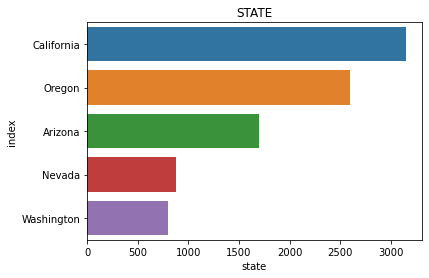

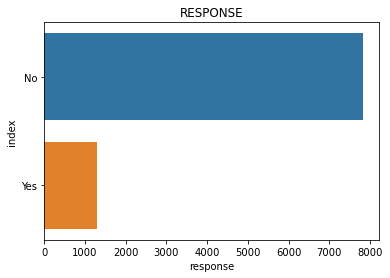

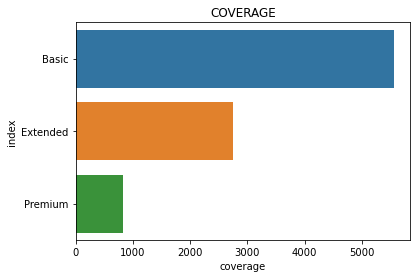

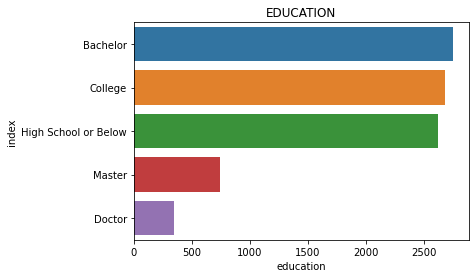

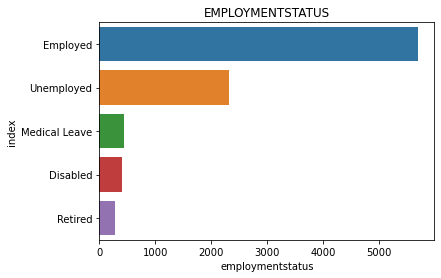

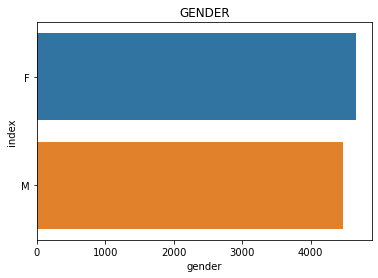

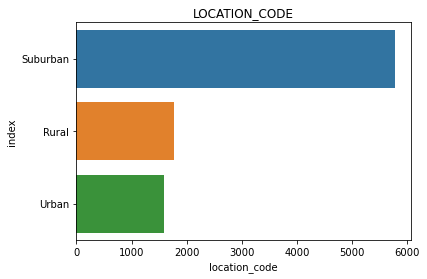

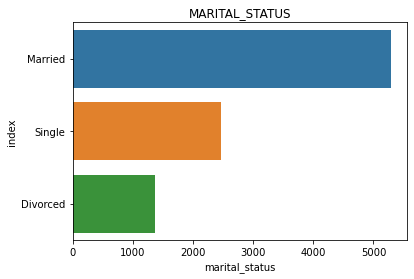

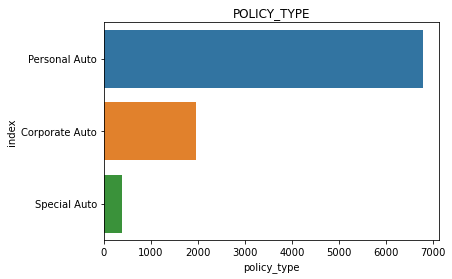

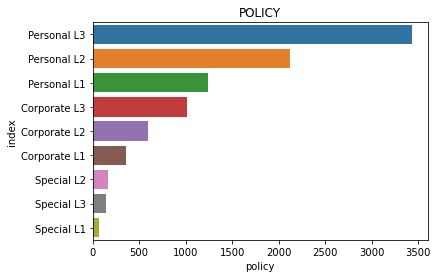

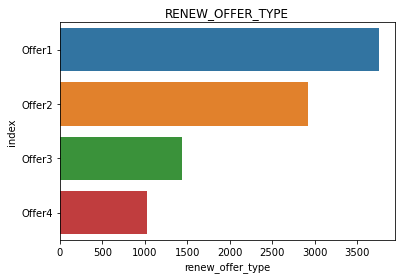

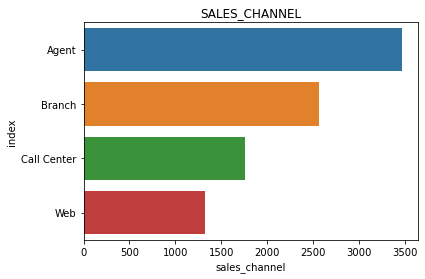

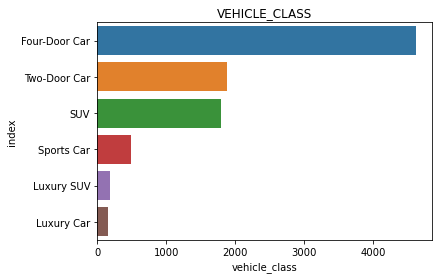

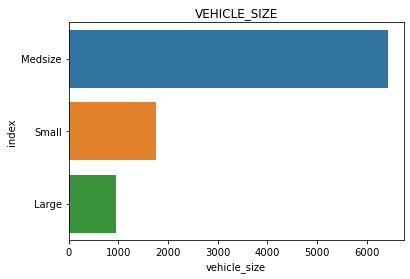

<Figure size 432x288 with 0 Axes>

In [71]:
categorical_columns = cat2.columns
plot_cat(cat2,categorical_columns)

In [79]:
# For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
for col in categorical_columns:
    print(f'Unique values for column {col.upper()}\n{cat2[col].value_counts()}')


Unique values for column STATE
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
Unique values for column RESPONSE
No     7826
Yes    1308
Name: response, dtype: int64
Unique values for column COVERAGE
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Unique values for column EDUCATION
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Unique values for column EMPLOYMENTSTATUS
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
Unique values for column GENDER
F    4658
M    4476
Name: gender, dtype: int64
Unique values for column LOCATION_CODE
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Unique values for column MARITAL_STATUS
Marri

In [ ]:
#There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
#yes, there is, and they are editted in the following

In [31]:
def fix_policy_type(x):
    
        x = x.replace(" ","")
        x = x.replace('Auto',"")
        return x

In [32]:
def fix_policy(x):
    dictionary = {" ":"", "Corporate":"","Personal":"", "Special":"" } 
    for key in dictionary.keys():
        x = x.replace(key, dictionary[key])
    return x


In [33]:
cat['policy'] = cat['policy'].apply(fix_policy)
cat['policy_type'] = cat['policy_type'].apply(fix_policy_type)

In [34]:
cat['policy']

0       L3
1       L3
2       L3
3       L2
4       L1
        ..
9129    L1
9130    L3
9131    L2
9132    L2
9133    L3
Name: policy, Length: 9134, dtype: object

In [35]:
cat['policy_type']

0       Corporate
1        Personal
2        Personal
3       Corporate
4        Personal
          ...    
9129     Personal
9130    Corporate
9131    Corporate
9132     Personal
9133    Corporate
Name: policy_type, Length: 9134, dtype: object

In [36]:
#What should we do with the customer_id column?
#It could be dropped
cat.drop(['customer'],axis = 1)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal,L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate,L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate,L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal,L2,Offer3,Branch,Four-Door Car,Large


In [89]:
#Plot time variable. Can you extract something from it?
time_series = pd.DataFrame(customer_df['effective_to_date'].value_counts().reset_index())
                        
time_series.columns =['date', 'count']

(array([734138., 734145., 734152., 734159., 734169., 734176., 734183.,
        734190., 734197.]),
 <a list of 9 Text major ticklabel objects>)

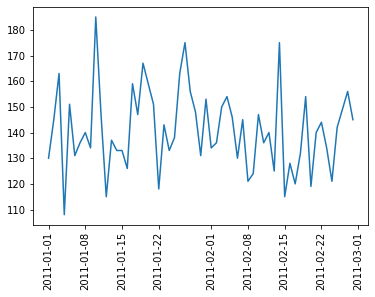

In [91]:
time_series = time_series.sort_values('date', ascending = True)
plt.plot(time_series['date'], time_series['count'])
plt.xticks(rotation = 'vertical')